In [1]:
#quickstart
from pathlib import Path
import pandas as pd
from bids import BIDSLayout
from joblib import Parallel, delayed
import nilearn
import nibabel as nib
import nltools.prefs as prf
from nilearn import datasets, image, plotting, input_data
from nilearn.masking import apply_mask
from nilearn.image import resample_to_img
from nilearn.image import concat_imgs, index_img
import numpy as np
import matplotlib.pylab as plt

import rpy2
from rpy2.robjects.packages import importr
from pymer4 import Lmer
psych = importr('psych')


import rpy2.robjects as ro
from rpy2.robjects import pandas2ri

from rpy2.robjects.conversion import localconverter

import os
import glob
import seaborn as sns
from nltools.data import Brain_Data, Design_Matrix, Adjacency
from nltools.mask import expand_mask, roi_to_brain
from nltools.stats import zscore
from scipy.stats import binom, ttest_1samp
from sklearn.metrics import pairwise_distances
from nltools.stats import fdr, one_sample_permutation
from copy import deepcopy
from nltools.utils import get_anatomical
import nltools.plotting as nlplt
from datetime import date
from joblib import Parallel, delayed

from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

from nilearn.input_data import NiftiMapsMasker
from nilearn.connectome import ConnectivityMeasure

#dat_paths = pd.read_csv('/data/MBDU/midla/notebooks/campcc/dat_paths_11272019.csv') 
#atlas = image.load_img('/data/MBDU/midla/notebooks/campcc/hox_msdl_atlas.nii.gz')
#sub1 = image.load_img('/data/MBDU/midla/data/derivatives/fmriprep/rn_aroma_20190910_2mm/sub-20900/out/fmrip

%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 500)
pd.set_option('display.width', 1000)

from IPython.core.display import display, HTML
display(HTML("<style>"
    + "#notebook { padding-top:0px !important; } " 
    + ".container { width:100% !important; } "
    + ".end_space { min-height:0px !important; } "
    + "</style>"))

KeyboardInterrupt: 

In [ ]:
import sys
import pandas as pd
import rpy2
from rpy2.robjects.packages import importr
from pymer4 import Lmer
psych = importr('psych')
import numpy as np

import rpy2.robjects as ro
from rpy2.robjects import pandas2ri

from rpy2.robjects.conversion import localconverter

import os
import glob
import seaborn as sns
from statistics import mean

In [446]:
dat_paths = pd.read_csv('/data/MBDU/midla/notebooks/campcc/dat_paths_for_icc.csv',index_col=0)
rest_paths = pd.read_csv('/data/MBDU/midla/notebooks/campcc/rest_paths_for_icc.csv',index_col=0)

In [71]:
dat_paths.to_csv('/data/MBDU/midla/notebooks/campcc/dat_paths_for_icc.csv',index=None)
rest_paths.to_csv('/data/MBDU/midla/notebooks/campcc/rest_paths_for_icc.csv',index=None)

In [447]:
dat_paths = dat_paths.merge(rest_paths,how='inner',on=['subject','session','run'])

In [449]:
dat_paths.to_csv('/data/MBDU/midla/notebooks/campcc/merged_paths_for_icc.csv',index=None)

In [966]:
dat_paths = pd.read_csv('/data/MBDU/midla/notebooks/campcc/merged_paths_for_icc.csv')

In [448]:
single_ses_subs = dat_paths.loc[dat_paths.session.astype(int) <= 4, :].groupby('subject').session.nunique().reset_index().query('session <= 2').subject
dat_ind = ~dat_paths.subject.isin(single_ses_subs) & (dat_paths.session.astype(int) <= 4)
dat_paths = dat_paths.loc[dat_ind]
len(dat_paths)

105

In [239]:
sub_df = pd.DataFrame(dat_paths.subject.unique()).rename(columns={0:'subject'})

In [240]:
boots = pd.DataFrame(np.random.randint(0,sub_df.index.max(), size=[len(sub_df), 10000]), columns=[f'boot_{nn:05d}' for nn in np.arange(1,10001)])

In [241]:
boots = pd.concat([pd.DataFrame(sub_df.index.values, columns=['boot_00000']),boots],axis = 1)

In [242]:
for i in range(boots.shape[0]):
    for j in range(boots.shape[1]):
        boots.loc[i][j] = sub_df.loc[boots.loc[i][j]]

In [245]:
boots.to_csv('/data/MBDU/midla/notebooks/campcc/test_retest/matrices_for_icc/bootstrap.csv',index=None)

In [184]:
cfd_dict = {0:'cc',
           1:'ccm',
           2:'ccmp',
           3:'ccmt',
           4:'ccmpt'}

In [415]:
bs_col = boots[boots.columns[1]]

In [308]:
dat_paths = pd.DataFrame(bs_col).rename(columns={bs_col.name:'subject'}).merge(dat_paths_func, how='left', on=['subject'])

In [193]:
icc(bs_col,cfd_dict[1],dat_paths,icc_dat,alph)

KeyboardInterrupt: 

In [ ]:
icc_dat = pd.DataFrame()
icc_dat['subject'] = ['']
icc_dat['session'] = ['']

for i in range(0,52):
    for j in range(0,52):
        icc_dat['{}_{}'.format(i,j)] = [0.0]

dat_paths = pd.DataFrame(bs_col).rename(columns={bs_col.name:'subject'}).merge(dat_paths, how='left', on=['subject'])
for _,row in dat_paths.iterrows():
    corr = pd.read_csv('/data/MBDU/midla/notebooks/campcc/test_retest/matrices_for_icc/ifc/cm_{}_session_{}_run_{}_task_{}_cfd_{}.csv'.format(row.subject,row.session,row.run,'mid',cfd_alph),header=None)
    newrow = []
    newrow.append('{}'.format(row.subject))
    newrow.append('{}'.format(row.session))
    for i in range(corr.shape[0]):
            for j in range(corr.shape[1]):
                newrow.append(corr[i][j])
    icc_dat.loc[_] = newrow

In [408]:
dat_sort = dat_paths.sort_values(by = ['subject','session'])

In [411]:
len(dat_sort.loc[dat_sort.duplicated()])

0

In [412]:
dat_sort

,subject,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,session,run,task_x,confounds_path_x,image_path_x,...,alt_ts_path,alt_rs_path,cfds_physio_path_x,confounds_path_y,image_path_y,mask_path_y,scaled_path_y,task_y,cfds_physio_path_y,unique_session
60,22409,19,19,19,19,1,1,mid,/data/MBDU/midla/data/derivatives/fitlins/nobu...,/data/MBDU/midla/data/derivatives/fmriprep/rn_...,...,/data/MBDU/midla/notebooks/campcc/alt_rs_conn/...,/data/MBDU/midla/notebooks/campcc/alt_rs_conn/...,/data/MBDU/midla/notebooks/campcc/physio/new_c...,/data/MBDU/midla/data/derivatives/fitlins/rest...,/data/MBDU/midla/data/derivatives/fmriprep/rn_...,/data/MBDU/midla/data/derivatives/fmriprep/rn_...,/data/MBDU/midla/data/derivatives/fmriprep/rn_...,rest,/data/MBDU/midla/notebooks/campcc/physio/new_c...,1
86,22409,19,19,19,19,1,1,mid,/data/MBDU/midla/data/derivatives/fitlins/nobu...,/data/MBDU/midla/data/derivatives/fmriprep/rn_...,...,/data/MBDU/midla/notebooks/campcc/alt_rs_conn/...,/data/MBDU/midla/notebooks/campcc/alt_rs_conn/...,/data/MBDU/midla/notebooks/campcc/physio/new_c...,/data/MBDU/midla/data/derivatives/fitlins/rest...,/data/MBDU/midla/data/derivatives/fmriprep/rn_...,/data/MBDU/midla/data/derivatives/fmriprep/rn_...,/data/MBDU/midla/data/derivatives/fmriprep/rn_...,rest,/data/MBDU/midla/notebooks/campcc/physio/new_c...,3
61,22409,20,20,20,20,2,1,mid,/data/MBDU/midla/data/derivatives/fitlins/nobu...,/data/MBDU/midla/data/derivatives/fmriprep/rn_...,...,/data/MBDU/midla/notebooks/campcc/alt_rs_conn/...,/data/MBDU/midla/notebooks/campcc/alt_rs_conn/...,/data/MBDU/midla/notebooks/campcc/physio/new_c...,/data/MBDU/midla/data/derivatives/fitlins/rest...,/data/MBDU/midla/data/derivatives/fmriprep/rn_...,/data/MBDU/midla/data/derivatives/fmriprep/rn_...,/data/MBDU/midla/data/derivatives/fmriprep/rn_...,rest,/data/MBDU/midla/notebooks/campcc/physio/new_c...,2
87,22409,20,20,20,20,2,1,mid,/data/MBDU/midla/data/derivatives/fitlins/nobu...,/data/MBDU/midla/data/derivatives/fmriprep/rn_...,...,/data/MBDU/midla/notebooks/campcc/alt_rs_conn/...,/data/MBDU/midla/notebooks/campcc/alt_rs_conn/...,/data/MBDU/midla/notebooks/campcc/physio/new_c...,/data/MBDU/midla/data/derivatives/fitlins/rest...,/data/MBDU/midla/data/derivatives/fmriprep/rn_...,/data/MBDU/midla/data/derivatives/fmriprep/rn_...,/data/MBDU/midla/data/derivatives/fmriprep/rn_...,rest,/data/MBDU/midla/notebooks/campcc/physio/new_c...,6
62,22409,21,21,21,21,3,1,mid,/data/MBDU/midla/data/derivatives/fitlins/nobu...,/data/MBDU/midla/data/derivatives/fmriprep/rn_...,...,/data/MBDU/midla/notebooks/campcc/alt_rs_conn/...,/data/MBDU/midla/notebooks/campcc/alt_rs_conn/...,/data/MBDU/midla/notebooks/campcc/physio/new_c...,/data/MBDU/midla/data/derivatives/fitlins/rest...,/data/MBDU/midla/data/derivatives/fmriprep/rn_...,/data/MBDU/midla/data/derivatives/fmriprep/rn_...,/data/MBDU/midla/data/derivatives/fmriprep/rn_...,rest,/data/MBDU/midla/notebooks/campcc/physio/new_c...,9
88,22409,21,21,21,21,3,1,mid,/data/MBDU/midla/data/derivatives/fitlins/nobu...,/data/MBDU/midla/data/derivatives/fmriprep/rn_...,...,/data/MBDU/midla/notebooks/campcc/alt_rs_conn/...,/data/MBDU/midla/notebooks/campcc/alt_rs_conn/...,/data/MBDU/midla/notebooks/campcc/physio/new_c...,/data/MBDU/midla/data/derivatives/fitlins/rest...,/data/MBDU/midla/data/derivatives/fmriprep/rn_...,/data/MBDU/midla/data/derivatives/fmriprep/rn_...,/data/MBDU/midla/data/derivatives/fmriprep/rn_...,rest,/data/MBDU/midla/notebooks/campcc/physio/new_c...,27
44,23017,40,40,40,40,1,1,mid,/data/MBDU/midla/data/derivatives/fitlins/nobu...,/data/MBDU/midla/data/derivatives/fmriprep/rn_...,...,/data/MBDU/midla/notebooks/campcc/alt_rs_conn/...,/data/MBDU/midla/notebooks/campcc/alt_rs_conn/...,/data/MBDU/midla/notebooks/campcc/physio/new_c...,/data/MBDU/midla/data/derivatives/fitlins/rest...,/data/MBDU/midla/data/derivatives/fmriprep/rn_...,/data/MBDU/midla/data/derivatives/fmriprep/rn_...,/data/MBDU/midla/data/derivatives/fmriprep/rn_...,rest,/data

In [410]:
dat_sort['unique_session'] = dat_sort['session']
while(len(dat_sort.loc[dat_sort.duplicated()]) > 0):
    for _,row in dat_sort.loc[dat_sort.duplicated(subset=['subject','unique_session'])].iterrows():
        dat_sort['unique_session'][_] = row.unique_session*3

/gpfs/gsfs11/users/MBDU/midla/env/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [386]:
icc_dat_func = pd.DataFrame()
icc_dat_func['subject'] = ['']
icc_dat_func['unique_session'] = ['']

for i in range(0,52):
    for j in range(0,52):
        icc_dat_func['{}_{}'.format(i,j)] = [0.0]

for _,row in dat_sort.iterrows():
    corr = pd.read_csv('/data/MBDU/midla/notebooks/campcc/test_retest/matrices_for_icc/ifc/cm_{}_session_{}_run_{}_task_{}_cfd_{}.csv'.format(row.subject,row.session,row.run,'mid',cfd_alph),header=None)
    newrow = []
    newrow.append('{}'.format(row.subject))
    newrow.append('{}'.format(row.unique_session))
    for i in range(corr.shape[0]):
            for j in range(corr.shape[1]):
                newrow.append(corr[i][j])
    icc_dat_func.loc[_] = newrow

In [417]:
icc_dat_func = pd.DataFrame()
icc_dat_func['subject'] = ['']
icc_dat_func['unique_session'] = ['']

for i in range(0,52):
    for j in range(0,52):
        icc_dat_func['{}_{}'.format(i,j)] = [0.0]

In [420]:
coldrop = []
for x in range(2,len(icc_dat_func.columns)):
    meas = icc_dat_func.columns[x].split('_')
    if int(meas[0]) <= int(meas[1]):
        coldrop.append(icc_dat_func.columns[x])
icc_dat_func = icc_dat_func.drop(columns=coldrop)

In [421]:
icc_dat_func.columns

Index(['subject', 'unique_session', '1_0', '2_0', '2_1', '3_0', '3_1', '3_2',
       '4_0', '4_1',
       ...
       '51_41', '51_42', '51_43', '51_44', '51_45', '51_46', '51_47', '51_48',
       '51_49', '51_50'],
      dtype='object', length=1328)

In [400]:
measure_iccs=[]
measure_cols = icc_dat_func.columns[3:]
for mc in measure_cols:
        psych_dat = icc_dat_func.loc[:, ['subject', 'session', mc]].set_index(['subject', 'session']).unstack()
        mc_res = psych.ICC(psych_dat, missing=False,alpha=alph)
        mc_res = mc_res[0].loc[['Single_random_raters', 'Single_fixed_raters']]
        mc_res['measure'] = mc
        measure_iccs.append(mc_res)
measure_iccs = pd.concat(measure_iccs)

measure_df = pd.DataFrame(measure_iccs)
#measure_df.to_csv('/data/MBDU/midla/notebooks/campcc/test_retest/bootstraps/icc_{}_cfd_{}.csv'.format(bs_col.name,cfd_alph))

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSi

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSi

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSi

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSi

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSi

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSi

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSi

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSi

In [207]:
def icc(bs_col,cfd_alph,dat_paths,icc_dat,alph):
    dat_paths = pd.DataFrame(bs_col).rename(columns={bs_col.name:'subject'}).merge(dat_paths, how='left', on=['subject'])
    for _,row in dat_paths.iterrows():
        corr = pd.read_csv('/data/MBDU/midla/notebooks/campcc/test_retest/matrices_for_icc/ifc/cm_{}_session_{}_run_{}_task_{}_cfd_{}.csv'.format(row.subject,row.session,row.run,'mid',cfd_alph),header=None)
        newrow = []
        newrow.append('{}'.format(row.subject))
        newrow.append('{}'.format(row.session))
        for i in range(corr.shape[0]):
                for j in range(corr.shape[1]):
                    newrow.append(corr[i][j])
        icc_dat.loc[_] = newrow


    measure_iccs=[]
    measure_cols = icc_dat.columns[2:]
    for mc in measure_cols:
        psych_dat = icc_dat.loc[:, ['subject', 'session', mc]].set_index(['subject', 'session']).unstack()
        mc_res = psych.ICC(psych_dat, missing=False,alpha=alph)
        mc_res = mc_res[0].loc[['Single_random_raters', 'Single_fixed_raters']]
        mc_res['measure'] = mc
        measure_iccs.append(mc_res)
    measure_iccs = pd.concat(measure_iccs)    

    measure_df = pd.DataFrame(measure_iccs)
    measure_df.to_csv('/data/MBDU/midla/notebooks/campcc/test_retest/bootstraps/icc_{}_cfd_{}.csv'.format(bs_col.name,cfd_alph))

# random = measure_df[measure_df.type == 'ICC2']
# fixed = measure_df[measure_df.type == 'ICC3']

# matrix_ran = []
# x = 0
# for i in range(0,52):
#     matrix_ran.append([])
#     for j in range(0,52):
#         matrix_ran[i].append([])
#         matrix_ran[i][j] = random.ICC.iloc[x]
#         x = x + 1
        
# x=0
# matrix_fixed = []
# for i in range(0,52):
#     matrix_fixed.append([])
#     for j in range(0,52):
#         matrix_fixed[i].append([])
#         matrix_fixed[i][j] = fixed.ICC.iloc[x]
#         x = x + 1
        
# fixed_df = pd.DataFrame(matrix_fixed)
# random_df = pd.DataFrame(matrix_ran)

# labels = []
# for x in range(corr.shape[0]):
#     labels.append(str(x))

In [ ]:
#first arg: bootstrap #
#directory with timeseries
#output directory

In [501]:
df = pd.read_csv('/data/MBDU/midla/notebooks/campcc/test_retest/bootstraps/ifc_icc_boot_00002_cfd_cc.csv')
ifc_conn_physio = pd.read_csv('/data/MBDU/midla/notebooks/campcc/test_retest/bootstraps/ifc_icc_boot_00002_cfd_cc.csv')
ifc_conn_physio = ifc_conn_physio[ifc_conn_physio.type == 'ICC2']
ifc_conn_physio['upper bound'].describe()

count    1326.000000
mean        0.707066
std         0.129351
min         0.242702
25%         0.637358
50%         0.730395
75%         0.799371
max         0.928443
Name: upper bound, dtype: float64

In [434]:
cfd_alph

'ccm'

In [441]:
dat_paths['unique_subject']

0      23825
1      23825
2      23825
3      23809
4      23809
5      23809
6      23809
7      23660
8      23660
9      23660
10     23810
11     23810
12     23810
13     23520
14     23520
15     23520
16     23520
17     23732
18     23732
19     23732
20     23814
21     23814
22     23814
23     23765
24     23765
25     23765
26     24520
27     24520
28     24520
29     24520
       ...  
76     23668
77     23668
78     24540
79     24540
80     24540
81     24540
82     23643
83     23643
84     23643
85     23643
86     23409
87     23409
88     23409
89     24643
90     24643
91     24643
92     24643
93     23783
94     23783
95     23783
96     23783
97     26825
98     26825
99     26825
100    24757
101    24757
102    24757
103    23867
104    23867
105    23867
Name: unique_subject, Length: 106, dtype: int64

In [453]:
bs_col.name

'boot_00001'

In [455]:
icc_dat = pd.DataFrame()


icc_dat['unique_subject'] = ['']
icc_dat['session'] = ['']

for i in range(0,52):
    for j in range(0,52):
        icc_dat['{}_{}'.format(i,j)] = [0.0]

dat_paths = pd.DataFrame(bs_col).rename(columns={bs_col.name:'subject'}).merge(dat_paths, how='left', on=['subject'])

dat_paths['unique_subject'] = dat_paths['subject']
while(len(dat_paths.loc[dat_paths.duplicated(subset=['unique_subject','session'])]) > 0):
    for _,row in dat_paths.loc[dat_paths.duplicated(subset=['unique_subject','session'])].iterrows():
        dat_paths['unique_subject'][_] = row.unique_subject+10000

if metric == 'rs':
    task = 'rest'
else:
    task = 'mid'
for _,row in dat_paths.iterrows():
    corr = pd.read_csv(f'{corr_dir}/{metric}/cm_{row.subject}_session_{row.session}_run_{row.run}_task_{task}_cfd_{cfd_alph}.csv',header=None)
    newrow = []
    newrow.append('{}'.format(row.unique_subject))
    newrow.append('{}'.format(row.session))
    for i in range(corr.shape[0]):
            for j in range(corr.shape[1]):
                newrow.append(corr[i][j])
    icc_dat.loc[_] = newrow

# coldrop = []
# for x in range(2,len(icc_dat.columns)):
#     meas = icc_dat.columns[x].split('_')
#     if int(meas[0]) <= int(meas[1]):
#         coldrop.append(icc_dat.columns[x])
# icc_dat = icc_dat.drop(columns=coldrop)
# measure_iccs=[]

measure_cols = icc_dat.columns[2:]
for mc in measure_cols:
    psych_dat = icc_dat.loc[:, ['unique_subject', 'session', mc]].set_index(['unique_subject', 'session']).unstack()
    mc_res = psych.ICC(psych_dat, missing=False,alpha=alph)
    mc_res = mc_res[0].loc[['Single_random_raters', 'Single_fixed_raters']]
    mc_res['measure'] = mc
    measure_iccs.append(mc_res)
measure_iccs = pd.concat(measure_iccs)    

measure_df = pd.DataFrame(measure_iccs)
measure_df.to_csv(f'{output_dir}/{metric}_icc_{bs_col.name}_cfd_{cfd_alph}.csv')

/gpfs/gsfs11/users/MBDU/midla/env/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular)

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSi

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

From cffi callback <function _processevents at 0x2aaaea3838c8>:
Traceback (most recent call last):
  File "/gpfs/gsfs11/users/MBDU/midla/env/lib/python3.7/site-packages/rpy2/rinterf

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

From cffi callback <function _processevents at 0x2aaaea3838c8>:
Traceback (most recent call last):
  File "/gpfs/gsfs11/users/MBDU/midla/env/lib/python3.7/site-packages/rpy2/rinterface_lib/callbacks.py", line 262, in _processevents
    @ffi_proxy.callback(ffi_proxy._processevents_def,
KeyboardInterrupt
R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[w

    if not evt.wait(self.flush_timeout):
  File "/gpfs/gsfs11/users/MBDU/midla/env/lib/python3.7/threading.py", line 552, in wait
    signaled = self._cond.wait(timeout)
  File "/gpfs/gsfs11/users/MBDU/midla/env/lib/python3.7/threading.py", line 300, in wait
    gotit = waiter.acquire(True, timeout)
KeyboardInterrupt
R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

From cffi callback <function _processevents at 0x2aaaea3838c8>:
Traceback (most recent call last):
  File "/gpfs/gsfs11/users/MBDU/midla/env/lib/python3.7/site-packages/rpy2/rinterface_lib/callbacks.py", line 262, in _processevents
    @ffi_proxy.callback(ffi_proxy._processevents_def,
KeyboardInterrupt
R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular


KeyboardInterrupt: 

In [426]:
for 
    ! export PATH=/data/MBDU/midla/env/bin:$PATH; python run_bootstrap.py 1000 /data/MBDU/midla/notebooks/campcc/test_retest/matrices_for_icc/ cc /data/MBDU/midla/notebooks/campcc/merged_paths_for_icc.csv ifc /data/MBDU/midla/notebooks/campcc/test_retest/bootstraps/

run_bootstrap.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  dat_paths['unique_subject'][_] = row.unique_subject*2
R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to conso

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSi

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSi

In [717]:
#cmd_list_concat = []
cmd_list_bgc = []
corr_dir = '/data/MBDU/midla/notebooks/campcc/test_retest/matrices_for_icc/'
dat_dir = '/data/MBDU/midla/notebooks/campcc/merged_paths_for_icc.csv'
output_dir = '/data/MBDU/midla/notebooks/campcc/test_retest/bootstraps/'
for i in ['bgc']:
    for j in cfd_dict:
        cfd = cfd_dict[j]
        for k in range(1000,1001):
            cmd_list_bgc.append(f'! export PATH=/data/MBDU/midla/env/bin:$PATH; python run_bootstrap.py {k} {corr_dir} {cfd} {dat_dir} {i} {output_dir}')

In [718]:
len(cmd_list_bgc)

5

In [148]:
cmds = '\n'.join(cmd_list)

from pathlib import Path
swarm_file = Path('/data/MBDU/midla/notebooks/campcc/swarms/icc_swarm_file.txt')
swarm_file.write_text(cmds)

3917349

In [516]:
cmds = '\n'.join(cmd_list_concat)

from pathlib import Path
swarm_file_concat = Path('/data/MBDU/midla/notebooks/campcc/swarms/icc_swarm_file_concat.txt')
swarm_file_concat.write_text(cmds)

2651237

In [719]:
cmds = '\n'.join(cmd_list_bgc)

from pathlib import Path
swarm_file_bgc = Path('/data/MBDU/midla/notebooks/campcc/swarms/icc_swarm_file_bgc.txt')
swarm_file_bgc.write_text(cmds)

1322

In [494]:
swarm_file_10

PosixPath('/data/MBDU/midla/notebooks/campcc/swarms/icc_swarm_file_10.txt')

In [720]:
run_name = 'icc_bgc'
swarm_log_dir = '/data/MBDU/midla/notebooks/campcc/swarms/logs'

In [721]:
! swarm -f $swarm_file_bgc -g 5 -t 2 -b 60 --time 0:04:00 --logdir $swarm_log_dir --partition=quick --job-name $run_name

57108860


In [505]:
os.chdir("/data/MBDU/midla/notebooks/campcc/")

In [460]:
import glob, os
filelist = []
os.chdir("/data/MBDU/midla/notebooks/campcc/test_retest/bootstraps/")
for file in glob.glob("/data/MBDU/midla/notebooks/campcc/test_retest/bootstraps/ifc_icc_boot_*_cfd_cc.csv"):
    filelist.append(file)

In [466]:
measure_df = pd.read_csv(f)
random = measure_df[measure_df.type == 'ICC2']
means.append(random.ICC.mean)

In [477]:
means = pd.DataFrame()

In [ ]:
random.ICC

In [484]:
means = pd.DataFrame()
for f in filelist:
    measure_df = pd.read_csv(f)
    random = measure_df[measure_df.type == 'ICC2']
    means = pd.concat([means,random.ICC],axis=1)

In [485]:
means.shape

(1326, 1000)

In [486]:
meanscopy = means

In [488]:
means = pd.concat([means,random.measure],axis=1).set_index(['measure'])

In [611]:
corr = []
means = {}
for i in ['ifc','rs','bgc','concat']:
    for j in cfd_dict:
        means[f'{i}_{cfd_dict[j]}_corr'] = []
        corr = []
        for _,row in dat_paths.iterrows():
            if i == 'rs':
                task = 'rest'
            else:
                task = 'mid'
            corr.append(pd.read_csv(f'/data/MBDU/midla/notebooks/campcc/test_retest/matrices_for_icc/{i}/cm_{row.subject}_session_{row.session}_run_{row.run}_task_{task}_cfd_{cfd_dict[j]}.csv',header=None).values)
        means[f'{i}_{cfd_dict[j]}_corr'].append(corr)
        

In [1290]:
df = pd.DataFrame()
means_dict = {}
for x in df2:
    means_dict[x] = []
    for i in range(means[x][0].shape[0]):
        means_dict[x].append([])
        for j in range(means[x][0].shape[1]):
            roi = []
            means_dict[x][i].append([])
            for sub in range(len(means[x])):
                roi.append(df2[x][sub][i][j])
            means_dict[x][i][j] = mean(roi)
    df[f'{x}'] = means_dict[x]

IndexError: invalid index to scalar variable.

In [1293]:
df2[x][sub][i]

1.0

In [707]:
df2 = {}
for col in df.columns: 
    matrix_fixed = []
    for i in range(0,52):
        matrix_fixed.append([])
        for j in range(0,52):
            matrix_fixed[i].append([])
            matrix_fixed[i][j] = df[col][i][j]

    df2[col] = pd.DataFrame(matrix_fixed)

labels = []
for y in range(0,52):
    labels.append(str(y))

In [1070]:
import matplotlib.style as style
import seaborn as sns
style.available

['fast',
 'seaborn-white',
 'seaborn-ticks',
 'bmh',
 'seaborn-paper',
 'dark_background',
 'seaborn-pastel',
 'seaborn-dark',
 'grayscale',
 'seaborn-notebook',
 'tableau-colorblind10',
 'ggplot',
 'seaborn-deep',
 '_classic_test',
 'fivethirtyeight',
 'seaborn-dark-palette',
 'seaborn',
 'classic',
 'seaborn-muted',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-darkgrid',
 'seaborn-whitegrid',
 'seaborn-talk',
 'Solarize_Light2',
 'seaborn-poster']

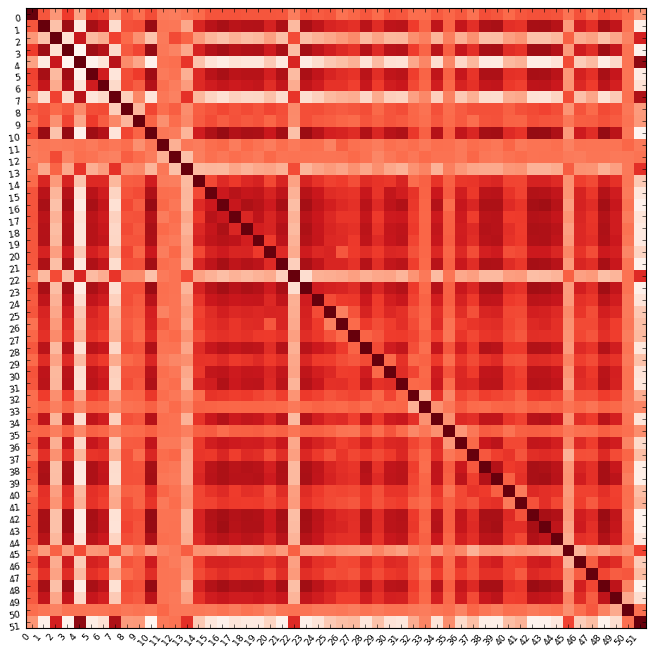

In [1087]:
style.use('classic')
fig,ax = plt.subplots(1,figsize = (10,10))
plotting.plot_matrix(df2['ifc_ccm_corr'], figure = fig,labels=labels,cmap = 'Reds',vmax = 1,colorbar = False)
fig.patch.set_facecolor('white')

In [712]:
df2.keys()

dict_keys(['ifc_cc_corr', 'ifc_ccm_corr', 'ifc_ccmp_corr', 'ifc_ccmt_corr', 'ifc_ccmpt_corr', 'rs_cc_corr', 'rs_ccm_corr', 'rs_ccmp_corr', 'rs_ccmt_corr', 'rs_ccmpt_corr', 'bgc_cc_corr', 'bgc_ccm_corr', 'bgc_ccmp_corr', 'bgc_ccmt_corr', 'bgc_ccmpt_corr', 'concat_cc_corr', 'concat_ccm_corr', 'concat_ccmp_corr', 'concat_ccmt_corr', 'concat_ccmpt_corr'])

In [ ]:
def load_data(path):
    name_parts = 
    dat = pd.read_csv(path)
    dat['timeseries'] = name_parts[0]
    dat['boot'] = name_parts[3]
    dat['cfd'] = name_parts[-1]
    dat = dat.loc[dat.type == 'ICC2', ['ICC', 'F', 'lower bound', 'upper bound', 'measure', 'timeseries', 'boot', 'cfd']]
    return dat
bs_res_dir = Path('/data/MBDU/midla/notebooks/campcc/test_retest/bootstraps/')
paths = sorted(bs_res_dir.glob('*.csv'))
bs_reses = Parallel(n_jobs=10, verbose=10)(delayed(load_data)(path) for path in paths)

In [ ]:
bs_res = pd.read_csv('/data/MBDU/midla/notebooks/campcc/test_retest/all_bs_results.csv')

In [1412]:
bs_new = bs_res

In [1418]:
indexNames = bs_res[(bs_res['timeseries'] == 'rs')].index
indexNames = indexNames.append(bs_res[bs_res['timeseries'] == 'concat'].index)

In [1419]:
bs_new = bs_new.drop(indexNames)

In [1421]:
indexNames = bs_new[bs_new['measure'].str.contains('_0')].index

In [1424]:
bs_new = bs_new.drop(indexNames)

In [1427]:
indexNames = bs_new[bs_new['cfd'] == 'cc.csv'].index

In [1428]:
len(indexNames)

2551275

In [1429]:
len(bs_new)

12756375

In [1430]:
bs_new = bs_new.drop(indexNames)

In [1434]:
len(bs_new)

10205100

In [1436]:
bs_new.reset_index()

,index,ICC,F,lower bound,upper bound,measure,timeseries,boot,cfd
0,1328,0.403682,3.707826,0.163952,0.662148,2_1,bgc,0,ccm.csv
1,1330,0.132279,1.609778,-0.059969,0.415230,3_1,bgc,0,ccm.csv
2,1331,0.479785,4.702848,0.239420,0.717762,3_2,bgc,0,ccm.csv
3,1333,0.146531,1.686752,-0.049646,0.430494,4_1,bgc,0,ccm.csv
4,1334,0.380994,3.461969,0.142738,0.644557,4_2,bgc,0,ccm.csv
5,1335,0.191591,1.958379,-0.014476,0.475719,4_3,bgc,0,ccm.csv
6,1337,0.256699,2.381397,0.035113,0.539093,5_1,bgc,0,ccm.csv
7,1338,0.497852,5.000990,0.258587,0.730176,5_2,bgc,0,ccm.csv
8,1339,0.440483,4.149025,0.199499,0.689707,5_3,bgc,0,ccm.csv
9,1340,0.360665,3.256500,0.124165,0.628387,5_4,bgc,0,ccm.csv


In [1439]:
bs_new.groupby(['timeseries',  'cfd', 'boot',])[['ICC']].mean().reset_index().groupby(['timeseries', 'cfd']).agg(['mean', 'std', 'count'])

boot                         ICC                
                       mean         std count      mean       std count
timeseries cfd                                                         
bgc        ccm.csv    499.5  288.819436  1000  0.343651  0.036088  1000
           ccmp.csv   499.5  288.819436  1000  0.323769  0.035107  1000
           ccmpt.csv  499.5  288.819436  1000  0.362276  0.032331  1000
           ccmt.csv   499.5  288.819436  1000  0.291237  0.032061  1000
ifc        ccm.csv    500.0  289.108111  1001  0.474969  0.034688  1001
           ccmp.csv   500.0  289.108111  1001  0.476353  0.034754  1001
           ccmpt.csv  500.0  289.108111  1001  0.477334  0.035927  1001
           ccmt.csv   500.0  289.108111  1001  0.476319  0.035731  1001

In [1440]:
bs_new.groupby(['timeseries',  'cfd', 'boot',])[['ICC']].std().reset_index().groupby(['timeseries', 'cfd']).agg(['mean', 'std', 'count'])

boot                         ICC                
                       mean         std count      mean       std count
timeseries cfd                                                         
bgc        ccm.csv    499.5  288.819436  1000  0.160671  0.011132  1000
           ccmp.csv   499.5  288.819436  1000  0.170945  0.012204  1000
           ccmpt.csv  499.5  288.819436  1000  0.173712  0.012619  1000
           ccmt.csv   499.5  288.819436  1000  0.174183  0.011798  1000
ifc        ccm.csv    500.0  289.108111  1001  0.165420  0.011341  1001
           ccmp.csv   500.0  289.108111  1001  0.164791  0.011448  1001
           ccmpt.csv  500.0  289.108111  1001  0.162079  0.011752  1001
           ccmt.csv   500.0  289.108111  1001  0.162646  0.011717  1001

In [1450]:
import matplotlib.style as style
import seaborn as sns
style.available

['fast',
 'seaborn-white',
 'seaborn-ticks',
 'bmh',
 'seaborn-paper',
 'dark_background',
 'seaborn-pastel',
 'seaborn-dark',
 'grayscale',
 'seaborn-notebook',
 'tableau-colorblind10',
 'ggplot',
 'seaborn-deep',
 '_classic_test',
 'fivethirtyeight',
 'seaborn-dark-palette',
 'seaborn',
 'classic',
 'seaborn-muted',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-darkgrid',
 'seaborn-whitegrid',
 'seaborn-talk',
 'Solarize_Light2',
 'seaborn-poster']

In [1459]:
style.use('seaborn-white')

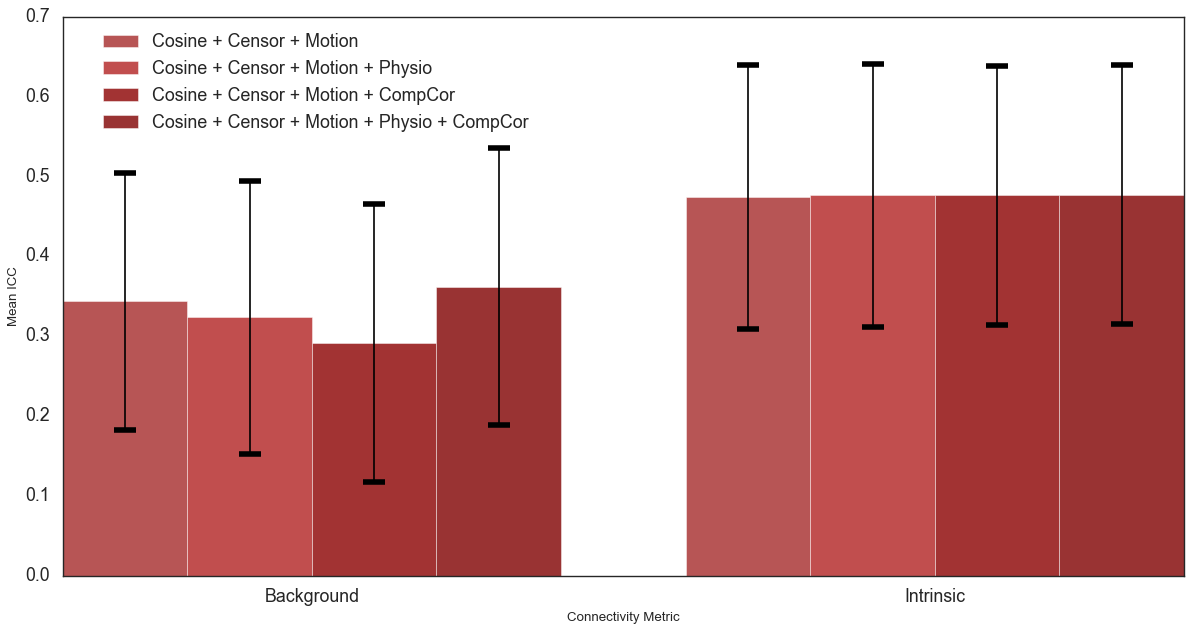

In [1460]:
n_groups = 2
means_ccm = (0.343651, 0.474969)
means_ccmp = (0.323769, 0.476353)
means_ccmt = (0.291237,0.476319)
means_ccmpt = (0.362276, 0.477334)

plt.rcParams.update({'font.size': 10})

# create plot
fig, ax = plt.subplots(figsize=(15,8))
index = np.arange(n_groups)
bar_width = 0.2
opacity = 0.8
cap=10

plt.errorbar(index-(.5*bar_width),means_ccm, yerr=[0.160671,0.165420], capsize=10, elinewidth=1.5, markeredgewidth=5,color='black',fmt='none')
plt.errorbar(index+(.5*bar_width),means_ccmp, yerr=[0.170945,0.164791], capsize=10, elinewidth=1.5, markeredgewidth=5,color='black',fmt='none')
plt.errorbar(index + (.5*bar_width)+bar_width,means_ccmt, yerr=[0.174183,0.162646], capsize=10, elinewidth=1.5, markeredgewidth=5,color='black',fmt='none')
plt.errorbar(index + (.5*bar_width)+(bar_width*2),means_ccmpt, yerr=[0.173712,0.162646], capsize=10, elinewidth=1.5, markeredgewidth=5,color='black',fmt='none')

rects1 = plt.bar(index-bar_width,means_ccm, bar_width,
alpha=opacity,color='brown',align='edge',
label='Cosine + Censor + Motion',capsize=20)

rects2 = plt.bar(index, means_ccmp, bar_width,
alpha=opacity,color='firebrick',align='edge',
label='Cosine + Censor + Motion + Physio',capsize=cap)

rects3 = plt.bar(index + bar_width, means_ccmt, bar_width,
alpha=opacity,color='darkred',align='edge',
label='Cosine + Censor + Motion + CompCor',capsize=cap)

rects4 = plt.bar(index + (bar_width*2), means_ccmpt, bar_width,
alpha=opacity,color='maroon',align='edge',
label='Cosine + Censor + Motion + Physio + CompCor',capsize=cap)

plt.xlabel('Connectivity Metric')
plt.ylabel('Mean ICC')
plt.xticks(index + bar_width, ('Background','Intrinsic'))
plt.legend(bbox_to_anchor=(.43, 1))

plt.tight_layout()
plt.show()

In [1357]:
bs_res.groupby(['timeseries',  'cfd', 'boot',])[['ICC']].std().reset_index().groupby(['timeseries', 'cfd']).agg(['mean', 'std', 'count'])

boot                         ICC                
                       mean         std count      mean       std count
timeseries cfd                                                         
bgc        cc.csv     499.5  288.819436  1000  0.167050  0.011134  1000
           ccm.csv    499.5  288.819436  1000  0.163432  0.011081  1000
           ccmp.csv   499.5  288.819436  1000  0.174929  0.013142  1000
           ccmpt.csv  499.5  288.819436  1000  0.176589  0.013194  1000
           ccmt.csv   499.5  288.819436  1000  0.181415  0.012673  1000
concat     cc.csv     500.0  289.108111  1001  0.318758  0.019813  1001
           ccm.csv    500.0  289.108111  1001  0.278133  0.015120  1001
           ccmp.csv   500.0  289.108111  1001  0.279174  0.017361  1001
           ccmpt.csv  500.0  289.108111  1001  0.291363  0.014226  1001
           ccmt.csv   500.0  289.108111  1001  0.296013  0.017157  1001
ifc        cc.csv     500.0  289.108111  1001  0.167523  0.010921  1001
           ccm.csv    500.0  289.108111  1001  0.169187  0.011771  1001
           ccmp.csv   500.0  289.108111  1001  0.168455  0.011864  1001
           ccmpt.csv  500.0  289.108111  1001  0.165550  0.012256  1001
           ccmt.csv   500.0  289.108111  1001  0.166185  0.012246  1001
rs         cc.csv     500.0  289.108111  1001  0.130308  0.008024  1001
           ccm.csv    500.0  289.108111  1001  0.097634  0.006008  1001
           ccmp.csv   500.0  289.108111  1001  0.090788  0.006421  1001
           ccmpt.csv  500.0  289.108111  1001  0.087202  0.007766  1001
           ccmt.csv   500.0  289.108111  1001  0.085549  0.006695  1001

In [855]:
bs_std_dropped = bs_res.groupby(['timeseries',  'cfd', 'boot',])[['ICC']].std().reset_index().groupby(['timeseries', 'cfd']).agg(['mean', 'std', 'count'])

In [864]:
bs_std = bs_std_dropped.drop(index=['concat']).drop(index=['rs']).drop(index=[('bgc','cc.csv')]).drop(index=[('ifc','cc.csv')])

In [788]:
bs_grouped = bs_res.groupby(['timeseries',  'cfd', 'boot',])[['ICC']].mean().reset_index().groupby(['timeseries', 'cfd']).agg(['mean', 'std', 'count'])

In [810]:
bs_dropped = bs_grouped.loc['bgc':'ifc'].drop(index='concat')

In [811]:
bs_dropped = bs_

boot                         ICC                
                       mean         std count      mean       std count
timeseries cfd                                                         
bgc        cc.csv     499.5  288.819436  1000  0.468355  0.033560  1000
           ccm.csv    499.5  288.819436  1000  0.350017  0.036514  1000
           ccmp.csv   499.5  288.819436  1000  0.331678  0.035542  1000
           ccmpt.csv  499.5  288.819436  1000  0.369133  0.032085  1000
           ccmt.csv   499.5  288.819436  1000  0.301471  0.032390  1000
ifc        cc.csv     500.0  289.108111  1001  0.460545  0.033073  1001
           ccm.csv    500.0  289.108111  1001  0.482938  0.034997  1001
           ccmp.csv   500.0  289.108111  1001  0.484229  0.035088  1001
           ccmpt.csv  500.0  289.108111  1001  0.485055  0.036266  1001
           ccmt.csv   500.0  289.108111  1001  0.484097  0.036049  1001

In [827]:
bs_dropped = bs_dropped.drop(index=[('bgc','cc.csv')])

In [828]:
bs_dropped = bs_dropped.drop(index=[('ifc','cc.csv')])

In [915]:
boot_level_difs.loc[boot_level_difs.cfd == 'ccmp.csv', 'diff']

2      -0.166865
7      -0.111924
12     -0.150774
17     -0.165244
22     -0.140703
27     -0.097308
32     -0.191721
37     -0.146178
42     -0.175070
47     -0.085313
52     -0.182894
57     -0.155418
62     -0.088371
67     -0.133858
72     -0.135363
77     -0.173944
82     -0.145756
87     -0.131700
92     -0.152811
97     -0.170490
102    -0.148312
107    -0.182972
112    -0.137659
117    -0.167627
122    -0.166488
127    -0.165653
132    -0.109373
137    -0.138976
142    -0.155239
147    -0.120113
152    -0.174905
157    -0.105559
162    -0.124759
167    -0.118781
172    -0.107003
177    -0.157423
182    -0.096676
187    -0.182695
192    -0.180283
197    -0.125609
202    -0.112411
207    -0.117882
212    -0.178839
217    -0.136034
222    -0.182890
227    -0.120966
232    -0.130045
237    -0.096889
242    -0.133320
247    -0.123918
252    -0.139081
257    -0.191738
262    -0.140509
267    -0.180103
272    -0.157566
277    -0.238758
282    -0.204522
287    -0.188863
292    -0.1601

In [ ]:
bgc = bs_res.loc[(bs_res.timeseries == 'bgc'), ['ICC','boot', 'measure', 'cfd']]
ifc = bs_res.loc[(bs_res.timeseries == 'ifc'), ['ICC','boot', 'measure', 'cfd']]
ts_df = bgc.merge(ifc, how='outer', on=['boot', 'measure', 'cfd'], suffixes=['_bgc', '_ifc'])
ts_df['diff'] = ts_df.ICC_bgc - ts_df.ICC_ifc
boot_level_difs = ts_df.groupby(['boot', 'cfd']).mean().reset_index()

In [1010]:
bgc_ccm = bgc.loc[(bgc.cfd == 'ccm.csv')]
bgc_ccmp = bgc.loc[(bgc.cfd == 'ccmp.csv')]
bgc_ccmt = bgc.loc[(bgc.cfd == 'ccmt.csv')]
bgc_ccmpt = bgc.loc[(bgc.cfd == 'ccmpt.csv')]

In [1011]:
ifc_ccm = ifc.loc[(ifc.cfd == 'ccm.csv')]
ifc_ccmp = ifc.loc[(ifc.cfd == 'ccmp.csv')]
ifc_ccmt = ifc.loc[(ifc.cfd == 'ccmt.csv')]
ifc_ccmpt = ifc.loc[(ifc.cfd == 'ccmpt.csv')]

In [1059]:
ts_df = bgc_ccmt.merge(bgc_ccmpt,how='outer', on=['boot', 'measure'], suffixes=['_ccm', '_ccmpt'])
ts_df['diff'] = ts_df.ICC_ccm - ts_df.ICC_ccmpt
boot_level_difs = ts_df.groupby(['boot']).mean().reset_index()

In [1317]:
#ifc = bs_res.loc[(bs_res.timeseries == 'bgc'), ['ICC','boot', 'measure', 'cfd']]
measure_aveif = ifc.groupby(['measure']).mean().reset_index()

In [1318]:
for i in range(len(measure_aveif)):
    measure_aveif['measure'][i] = measure_aveif['measure'][i].split('_')

/gpfs/gsfs11/users/MBDU/midla/env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# Remapping

In [1486]:
img = image.load_img(row.scaled_path_x)

In [1492]:
atlas_4d_dat.shape

(64, 53, 64, 52)

In [1488]:
image.new_img_like(img,atlas_4d_dat,copy_header=False).shape

(64, 53, 64, 52)

In [1510]:
basc = datasets.fetch_atlas_basc_multiscale_2015(version='asym')
basc64 = basc['scale064']
atlas = image.load_img(basc64)
atlas_dat = atlas.get_fdata()
uvs = np.unique(atlas_dat)
atlas_in_4d = []
for uv in uvs:
    atlas_in_4d.append((atlas_dat == uv).astype(int))
atlas_4d_dat = np.array(atlas_in_4d)
atlas_dfs = []
for ii, aa in enumerate(atlas_in_4d):
    row = {}
    row['orig_ind'] = ii
    row['x_min'], row['y_min'], row['z_min'] = np.array(np.where(aa)).min(1)
    row['x_max'], row['y_max'], row['z_max'] = np.array(np.where(aa)).max(1)
    row['x_mean'], row['y_mean'], row['z_mean'] = np.array(np.where(aa)).mean(1)
    atlas_dfs.append(row)
atlas_dfs = pd.DataFrame(atlas_dfs)
atlas_df = atlas_dfs.sort_values('y_min', ascending=False).reset_index(drop=True).reset_index().rename(columns={'index':'new_index'})
atlas_df['match_ind'] = atlas_df.orig_ind + 1000
atlas_df['new_index'] +=1
atlas_df.loc[atlas_df['match_ind'] == 1000, 'new_index']=0
sorted_dat = atlas_dat + 1000
for ii, row in atlas_df.iterrows():
    sorted_dat[sorted_dat == row.match_ind] = row.new_index
sorted_atlas = image.new_img_like(atlas, sorted_dat, atlas.affine, atlas.header)
uvs = np.unique(sorted_dat)
atlas_in_4d = np.zeros(list(atlas.shape) + [len(uvs)-1], dtype=int)
for ii, uv in enumerate(uvs):
    if uv != 0:
        atlas_in_4d[:,:,:,ii-1] = (sorted_dat == uv).astype(int)
sorted_4d_img = image.new_img_like(atlas,atlas_in_4d, affine=atlas.affine,copy_header=True)

In [1501]:
regions_extracted_img = image.new_img_like(img,atlas_in_4d,copy_header=False)

In [1502]:
regions_extracted_img = resample_to_img(regions_extracted_img,img)

/gpfs/gsfs11/users/MBDU/midla/env/lib/python3.7/site-packages/nilearn/image/resampling.py:510: UserWarning: Casting data from int64 to float64
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


In [1505]:
regions_extracted_img.shape

(97, 115, 97, 64)

/gpfs/gsfs11/users/MBDU/midla/env/lib/python3.7/site-packages/nilearn/plotting/displays.py:98: UserWarning: No contour levels were found within the data range.
  **kwargs)


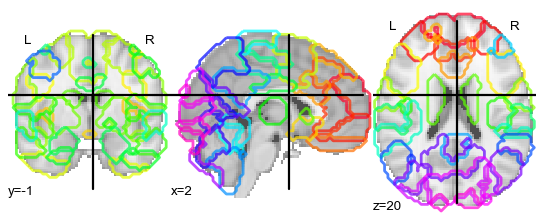

In [1511]:
plotting.plot_prob_atlas(sorted_4d_img)

In [1465]:
atlas_dfs = []
for ii, aa in enumerate(atlas_in_4d):
    row = {}
    row['orig_ind'] = ii
    row['x_min'], row['y_min'], row['z_min'] = np.array(np.where(aa)).min(1)
    row['x_max'], row['y_max'], row['z_max'] = np.array(np.where(aa)).max(1)
    row['x_mean'], row['y_mean'], row['z_mean'] = np.array(np.where(aa)).mean(1)
    atlas_dfs.append(row)
atlas_dfs = pd.DataFrame(atlas_dfs)
atlas_df = atlas_dfs.sort_values('y_min', ascending=False).reset_index(drop=True).reset_index().rename(columns={'index':'new_index'})
atlas_df['match_ind'] = atlas_df.orig_ind + 1000
atlas_df['new_index'] +=1
atlas_df.loc[atlas_df['match_ind'] == 1000, 'new_index']=0
sorted_dat = atlas_dat + 1000
for ii, row in atlas_df.iterrows():
    sorted_dat[sorted_dat == row.match_ind] = row.new_index
sorted_atlas = image.new_img_like(atlas, sorted_dat, atlas.affine, atlas.header)

In [1475]:
atlas_df.loc[atlas_df['orig_ind']==9].new_index

5    6
Name: new_index, dtype: int64

In [1478]:
x=0
matrix_fixed = []
j = 0
for i in range(0,51):
        matrix_fixed.append([])
        for j in range(0,51):
            if i > j:
                matrix_fixed[i].append([])
        #print(type(matrix_fixed[i][j])
        #matrix_fixed[i][j] = measure_ave[[]]
        #x = x + 1

In [1480]:
atlas_df

,new_index,orig_ind,x_max,x_mean,x_min,y_max,y_mean,y_min,z_max,z_mean,z_min,match_ind
0,1,51,36,26.315162,16,61,56.356899,49,37,28.646508,23,1051
1,2,54,42,29.970437,15,61,56.415167,48,27,20.634961,15,1054
2,3,41,31,26.004673,21,61,54.431464,45,24,19.711838,17,1041
3,4,52,40,20.173377,9,58,52.965489,45,38,28.784717,19,1052
4,5,33,32,25.790840,20,56,50.538931,45,33,25.897710,19,1033
5,6,9,32,26.002625,20,53,47.721785,43,40,36.086614,33,1009
6,7,49,46,22.133090,6,54,48.257065,41,29,21.113947,16,1049
7,8,40,42,25.246004,9,59,49.579929,40,20,16.160746,14,1040
8,9,60,35,22.349673,11,57,48.731209,39,45,38.382353,29,1060
9,10,6,31,25.903465,21,49,44.240099,39,37,32.160891,27,1006


In [ ]:
for i in range(len(measure_avebg)):
    matrix_fixed[measure_ave['measure'][i][0]][measure_ave['measure'][i][1]] = float(measure_ave['ICC'][i])

In [1476]:
measure_avebg = measure_ave

In [1319]:
for i in range(len(measure_aveif)):
    for j in range(len(measure_aveif['measure'][i])):
        measure_aveif['measure'][i][j] = int(measure_aveif['measure'][i][j])

In [1354]:
for i in range(len(measure_ave)):
    matrix_fixed[measure_ave['measure'][i][0]][measure_ave['measure'][i][1]] = float(measure_ave['ICC'][i])

In [1328]:
matrix_fixed

[[],
 [0.7544222232113571],
 [0.7169494313832713, 0.6142838493971536],
 [0.7938639604159899, 0.3523758006970936, 0.611243383641812],
 [0.7950254367607265,
  0.45120696875700134,
  0.4349852711504228,
  0.24249193199237568],
 [0.7338908364207448,
  0.3001575965713917,
  0.6297802974331119,
  0.4027783102983992,
  0.262975277754155],
 [0.7703960887121818,
  0.5390090674898351,
  0.532832683774693,
  0.5669761704020839,
  0.6610734112899163,
  0.4848215563937578],
 [0.7746142393580676,
  0.3691666717455506,
  0.6113872521583192,
  0.36032601934335395,
  0.37955525255360784,
  0.2377196510168125,
  0.5695702926460198],
 [0.5334691464124038,
  0.5921397629496402,
  0.5301125644104804,
  0.6082924614637246,
  0.5752482815346811,
  0.6168042449348815,
  0.530058755575803,
  0.6327490900308415],
 [0.5083840226764441,
  0.30430825128571565,
  0.43306945422003124,
  0.3758892285161772,
  0.4177984001304514,
  0.3504190413260928,
  0.3643992984676834,
  0.2525734612061662,
  0.48105106809661],
 [

In [1338]:
np.arange(0,52,5)

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50])

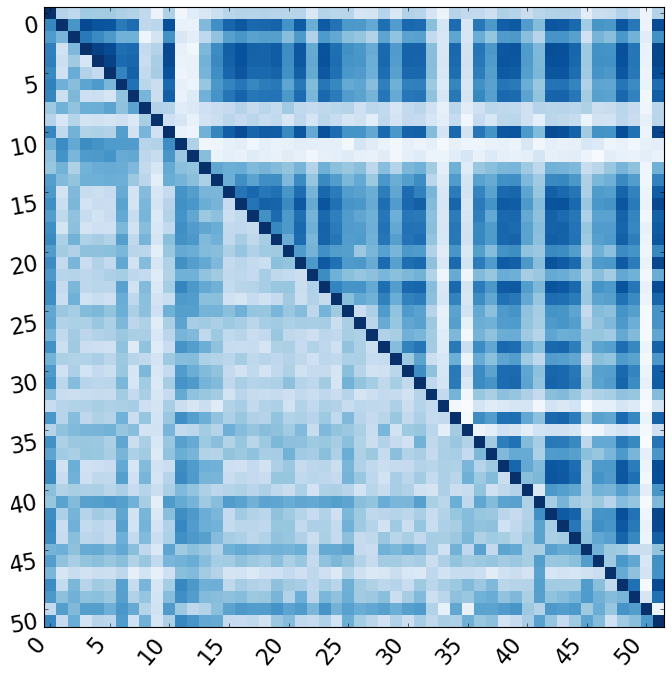

In [1356]:
fixed_df = pd.DataFrame(matrix_fixed,dtype='float64')
style.use('classic')
fig,ax = plt.subplots(1,figsize = (10,10))
plotting.plot_matrix(df2['bgc_ccmpt_corr'].abs(), tri='upper',figure = fig,labels=labels,cmap = 'Blues',vmin = 0,vmax = 1,colorbar = False,grid=False)
plotting.plot_matrix(fixed_df, figure = fig,labels=labels,cmap = 'Blues',vmax = 1,vmin=0,colorbar = False,grid=False)

plt.xticks(np.arange(0,52,5),fontsize=20)
ax.set_xticklabels(np.arange(0,52,5),fontsize=20)
plt.yticks(np.arange(0,52,5),fontsize=20)
ax.set_yticklabels(np.arange(0,52,5),fontsize=20)
fig.patch.set_facecolor('white')

In [1060]:
boot_level_difs.loc[:, 'diff'].quantile([0.05 / 16 / 2,0.05, 0.5, 0.975, 1 - (0.05 / 16 / 2)])

0.001563   -0.170273
0.050000   -0.130415
0.500000   -0.068315
0.975000    0.006161
0.998437    0.037076
Name: diff, dtype: float64

In [918]:
boot_level_difs.loc[boot_level_difs.cfd == 'ccm.csv', 'diff'].quantile([0.05 / 16 / 2,0.025, 0.5, 0.975, 1 - (0.05 / 16 / 2)])

0.001563   -0.251455
0.025000   -0.209615
0.500000   -0.133436
0.975000   -0.055859
0.998437   -0.000911
Name: diff, dtype: float64

In [924]:
boot_level_difs.loc[boot_level_difs.cfd == 'ccmp.csv', 'diff'].quantile([0.05 / 16 / 2,0.025, 0.5, 0.975, 1 - (0.001 / 16 / 2)])

0.001563   -0.236811
0.025000   -0.222616
0.500000   -0.152927
0.975000   -0.085917
0.999969   -0.033108
Name: diff, dtype: float64

In [925]:
boot_level_difs.loc[boot_level_difs.cfd == 'ccmt.csv', 'diff'].quantile([0.05 / 16 / 2,0.025, 0.5, 0.975, 1 - (0.001 / 16 / 2)])

0.001563   -0.252416
0.025000   -0.228224
0.500000   -0.183305
0.975000   -0.133415
0.999969   -0.108256
Name: diff, dtype: float64

In [926]:
boot_level_difs.loc[boot_level_difs.cfd == 'ccmpt.csv', 'diff'].quantile([0.05 / 16 / 2,0.025, 0.5, 0.975, 1 - (0.001 / 16 / 2)])

0.001563   -0.211745
0.025000   -0.181418
0.500000   -0.117328
0.975000   -0.045268
0.999969   -0.007713
Name: diff, dtype: float64

In [765]:
import matplotlib.style as style
import seaborn as sns
style.available

['fast',
 'seaborn-white',
 'seaborn-ticks',
 'bmh',
 'seaborn-paper',
 'dark_background',
 'seaborn-pastel',
 'seaborn-dark',
 'grayscale',
 'seaborn-notebook',
 'tableau-colorblind10',
 'ggplot',
 'seaborn-deep',
 '_classic_test',
 'fivethirtyeight',
 'seaborn-dark-palette',
 'seaborn',
 'classic',
 'seaborn-muted',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-darkgrid',
 'seaborn-whitegrid',
 'seaborn-talk',
 'Solarize_Light2',
 'seaborn-poster']

In [1136]:
style.use('seaborn-poster')

In [1330]:
len(dat_paths)

105

In [1131]:
subjects = dat_paths['subject'].unique()

In [982]:
subjects

array([22409, 22477, 23017, 23520, 23540, 23643, 23649, 23660, 23668,
       23717, 23720, 23732, 23745, 23746, 23757, 23759, 23765, 23772,
       23777, 23783, 23809, 23810, 23813, 23814, 23823, 23825, 23859,
       23867, 23907, 23912, 23943, 23951])

In [974]:
subject_info = pd.read_csv('/data/MBDU/midla/data/derivatives/midla/primary_20200325/session_data_ilr_20200325.csv')

In [980]:
subject_info = subject_info.loc[subject_info['subject'].isin(subjects)]

In [1001]:
sex = subject_info.loc[subject_info.duplicated(subset=['subject']) == False].loc[subject_info.sex == 'F']

In [1003]:
len(sex)

24